<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Opening-and-exploring-data" data-toc-modified-id="Opening-and-exploring-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Opening and exploring data</a></span></li><li><span><a href="#Searching-for-rows-with-missing-data" data-toc-modified-id="Searching-for-rows-with-missing-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Searching for rows with missing data</a></span></li><li><span><a href="#Removing-duplicate-entries" data-toc-modified-id="Removing-duplicate-entries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Removing duplicate entries</a></span><ul class="toc-item"><li><span><a href="#Part-One" data-toc-modified-id="Part-One-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Part One</a></span></li><li><span><a href="#Part-Two" data-toc-modified-id="Part-Two-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Part Two</a></span></li></ul></li><li><span><a href="#Removing-non-English-apps" data-toc-modified-id="Removing-non-English-apps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Removing non-English apps</a></span><ul class="toc-item"><li><span><a href="#Part-One" data-toc-modified-id="Part-One-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Part One</a></span></li><li><span><a href="#Part-Two" data-toc-modified-id="Part-Two-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Part Two</a></span></li></ul></li><li><span><a href="#Removing-non-free-apps" data-toc-modified-id="Removing-non-free-apps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Removing non-free apps</a></span></li><li><span><a href="#Common-apps-by-genre" data-toc-modified-id="Common-apps-by-genre-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Common apps by genre</a></span><ul class="toc-item"><li><span><a href="#Part-One" data-toc-modified-id="Part-One-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Part One</a></span></li><li><span><a href="#Part-Two" data-toc-modified-id="Part-Two-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Part Two</a></span></li></ul></li><li><span><a href="#Most-popular-apps-by-Genre-on-the-App-Store" data-toc-modified-id="Most-popular-apps-by-Genre-on-the-App-Store-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Most popular apps by Genre on the App Store</a></span></li><li><span><a href="#Most-popular-apps-by-Genre-on-Google-Play" data-toc-modified-id="Most-popular-apps-by-Genre-on-Google-Play-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Most popular apps by Genre on Google Play</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Profitable App Profiles for App Store and Google Play Markets

Analyzing data to help developers in the company understand what type of apps are likely to attract more users.

## Opening and exploring data

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.

Collecting data for over four million apps requires a significant amount of time and money, so we'll try to analyze a sample of data instead. To avoid spending resources with collecting new data ourselves, we should first try to see whether we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our purpose:

- A data set containing data about approximately ten thousand Android apps from Google Play.
- A data set containing data about approximately seven thousand iOS apps from the App Store.

Let's start by opening the two data sets and then continue with exploring the data.

In [1]:
from csv import reader

### The Google Play data set ###
opened_file = open('googleplaystore.csv')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

In [2]:
### The Apple Store data set ###
opened_file = open('AppleStore.csv')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

An easy exploration, please:, let's first write a function named explore_data() that we can use repeatedly to explore rows in a more readable way. We'll also add an option for our function to show the number of rows and columns for any data set.

In [3]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [4]:
explore_data(android,0, 5, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


Number of rows: 10841
Number of columns: 13


In [5]:
print(android_header)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


We see that the Google Play data set has 10841 apps and 13 columns. Initially, the columns that might be useful for the purpose of our analysis are 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', and 'Genres'.

Now let's take a look at the App Store data set.

In [6]:
explore_data(ios,0, 5, True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']


Number of rows: 7197
Number of columns: 16


In [7]:
print(ios_header)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


We have 7197 iOS apps in this data set, and the columns that seem interesting are: 'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', and 'prime_genre'. Not all column names are self-explanatory, but for more details we can go to the data set [documentation](https://www.example.com) at Kaggle.

## Searching for rows with missing data

The Google Play data set has a dedicated [discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion) section, and we can see that one of the discussions outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct.

In [8]:
for row in android[1:]:
    if len(row) != len(android_header):
        print(row)
        print("\n")
        print("Index postion is:", android.index(row))

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


Index postion is: 10472


The row 10472 corresponds to the app Life Made WI-Fi Touchscreen Photo Frame, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5 (as mentioned in the discussions section, this problem is caused by a missing value in the 'Category' column). We decide to delete this row.

In [9]:
android[10472]

['Life Made WI-Fi Touchscreen Photo Frame',
 '1.9',
 '19',
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 '',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

Since row 10472 is missing the "Category" field and the values are all moved, we procede to delete that row.

In [10]:
print(len(android))
del android[10472]
print(len(android))

10841
10840


## Removing duplicate entries

### Part One

It can happen that we have more than one entry for some apps. Let's check how many of them.

In [11]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

In [12]:
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:10])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack']


In [13]:
for app in android:
    name = app[0]
    if name == 'Slack':
        print(app)
print('\n')
print("Number of Slack duplicates:", len(app))

['Slack', 'BUSINESS', '4.4', '51507', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']
['Slack', 'BUSINESS', '4.4', '51507', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']
['Slack', 'BUSINESS', '4.4', '51510', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']


Number of Slack duplicates: 13


As an example, we have 13 entries for "Slack". The difference happens on the fourth positions which is the number of reviews. One criterion to remove duplicates would be the lowest number of reviews indicating an old register number. We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings are. One option would be a dictionary where each key is a unique app name, and the value is the highest number of reviews of that app.
The dictionary creates a new data set, which will have only one entry per app (and we only select the apps with the highest number of reviews)


### Part Two

Building the dictionary.

In [14]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = app[3]
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

In a previous code cell, we found that there are 1,181 cases where an app occurs more than once, so the length of our dictionary (of unique apps) should be equal to the difference between the length of our data set and 1,181.

In [15]:
print('Expected length:', len(android) - 1181)
print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


Now, let's use the reviews_max dictionary to remove the duplicates. For the duplicate cases, we'll only keep the entries with the highest number of reviews. In the code cell below:
- We start by initializing two empty lists, android_clean and already_added.
- We loop through the android data set, and for every iteration:
    - We isolate the name of the app and the number of reviews.
    - We add the current row (app) to the android_clean list, and the app name (name) to the already_added list if:
        - The number of reviews of the current app matches the number of reviews of that app as described in the reviews_max dictionary; and
        - The name of the app is not already in the already_added list. We need to add this supplementary condition to account for those cases where the highest number of reviews of a duplicate app is the same for more than one entry (for example, the Box app has three entries, and the number of reviews is the same). If we just check for reviews_max[name] == n_reviews, we'll still end up with duplicate entries for some apps.

In [16]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = app[3]
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

Now let's quickly explore the new data set, and confirm that the number of rows is 9,659.

In [17]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


Tada!!! 9659

## Removing non-English apps

### Part One

While exploring the data sets, we noticed that the names of some of the apps suggest they are not directed towards an English-speaking audience. Below, we see a couple of examples from both data sets:

In [18]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
Wowkwis aq Ka'qaquj
PHARMAGUIDE (DZ)


We're not interested in keeping these kind of apps, so we'll remove them. One way to go about this is to remove each app whose name contains a symbol that is not commonly used in English text — English text usually includes letters from the English alphabet, numbers composed of digits from 0 to 9, punctuation marks (., !, ?, ;, etc.), and other symbols (+, *, /, etc.).
All these characters that are specific to English texts are encoded using the ASCII standard. Each ASCII character has a corresponding number between 0 and 127 associated with it, and we can take advantage of that to build a function that checks an app name and tells us whether it contains non-ASCII characters.
We built this function below, and we use the built-in ord() function to find out the corresponding encoding number of each character.

In [19]:
def english_ok(string):
    for character in string:
        if ord(character) > 127:
            return False
    return True

print(english_ok('Instagram'))
print(english_ok('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(english_ok('Docs To Go™ Free Office Suite'))
print(english_ok('Instachat 😜'))

True
False
False
False


The function seems to work fine, but some English app names use emojis or other symbols (™, — (em dash), – (en dash), etc.) that fall outside of the ASCII range. Because of this, we'll remove useful apps if we use the function in its current form.

In [20]:
print(ord('™'))
print(ord('😜'))

8482
128540


### Part Two

Some English apps have symbols or characters out of 127 ASCII number. We need to adapt the function to avoid data loss. So we'll remove an app only if its name has more than three non-ASCII characters.

In [21]:
def english_ok(string):
    non_ascii = 0
    for character in string:
        if ord(character) > 127:
            non_ascii +=1
    if non_ascii > 3:
        return False
    else:
        return True

In [22]:
print(english_ok('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(english_ok('Docs To Go™ Free Office Suite'))
print(english_ok('Instachat 😜'))

False
True
True


The function is still not perfect, and very few non-English apps might get past our filter, but this seems good enough at this point in our analysis — we shouldn't spend too much time on optimization at this point.
Below, we use the english_ok() function to filter out the non-English apps for both data sets:

In [23]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if english_ok(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if english_ok(name):
        ios_english.append(app)
        
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

We can see that we're left with 9614 Android apps and 6183 iOS apps.

## Removing non-free apps

As we explained in the README file, we only build apps that are free to download and install. Our data sets contain both free and non-free apps, and we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets.

In [24]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
print(len(android_final))
print(len(ios_final))

8862
3222


We're left with 8864 Android apps and 3222 iOS apps, which should be enough for our analysis.

## Common apps by genre

We want to know which genre is more successful in both markets, Android or iOS. For this reason, we start by analysing the most common genres. We'll build a frequency table for the prime_genre column of the App Store data set, and the Genres and Category columns of the Google Play data set.

### Part One

We'll build two functions for the frequency tables:
- One function to generate frequency tables with percentages
- One function to display percentages in descending order

In [25]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    table_percent = {}
    for key in table:
        percent = (table[key] / total) * 100
        table_percent[key] = percent
    return table_percent

In [26]:
freq_table(ios_final, 1)

{'Facebook': 0.031036623215394164,
 'Instagram': 0.031036623215394164,
 'Clash of Clans': 0.031036623215394164,
 'Temple Run': 0.031036623215394164,
 'Pandora - Music & Radio': 0.031036623215394164,
 'Pinterest': 0.031036623215394164,
 'Bible': 0.031036623215394164,
 'Candy Crush Saga': 0.031036623215394164,
 'Spotify Music': 0.031036623215394164,
 'Angry Birds': 0.031036623215394164,
 'Subway Surfers': 0.031036623215394164,
 'Solitaire': 0.031036623215394164,
 'CSR Racing': 0.031036623215394164,
 'Crossy Road - Endless Arcade Hopper': 0.031036623215394164,
 'Injustice: Gods Among Us': 0.031036623215394164,
 'Hay Day': 0.031036623215394164,
 'PAC-MAN': 0.031036623215394164,
 'Calorie Counter & Diet Tracker by MyFitnessPal': 0.031036623215394164,
 'DragonVale': 0.031036623215394164,
 'The Weather Channel: Forecast, Radar & Alerts': 0.031036623215394164,
 'Head Soccer': 0.031036623215394164,
 'Google – Search made just for mobile': 0.031036623215394164,
 'Despicable Me: Minion Rush': 0.0

Oops, dictionaries sort by key, so we can't have them sorted by percentages. Let's create a function to display a sorted table for the most succesful apps.

In [27]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

### Part Two

Frequency table for "prime_genre" number of apps in App Store.

In [28]:
display_table(ios_final, -5)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


The most common genre among the free English apps (58.16%) is "Games" with a great difference compared to other classifications. It's obvious that most of the apps are created for fun. Anyway, it doesn't mean that most of users are downloading these ones.

Frequency table for Genres and Category in Android

In [29]:
display_table(android_final, 1)

FAMILY : 18.934777702550214
GAME : 9.693071541412774
TOOLS : 8.451816745655607
BUSINESS : 4.5926427443015125
LIFESTYLE : 3.9043105393816293
PRODUCTIVITY : 3.8930264048747465
FINANCE : 3.7011961182577298
MEDICAL : 3.5206499661475967
SPORTS : 3.39652448657188
PERSONALIZATION : 3.3175355450236967
COMMUNICATION : 3.238546603475513
HEALTH_AND_FITNESS : 3.080568720379147
PHOTOGRAPHY : 2.945159106296547
NEWS_AND_MAGAZINES : 2.798465357707064
SOCIAL : 2.663055743624464
TRAVEL_AND_LOCAL : 2.335815842924848
SHOPPING : 2.2455427668697814
BOOKS_AND_REFERENCE : 2.143985556307831
DATING : 1.8618821936357481
VIDEO_PLAYERS : 1.7941773865944481
MAPS_AND_NAVIGATION : 1.399232678853532
FOOD_AND_DRINK : 1.2412547957571656
EDUCATION : 1.1735499887158656
ENTERTAINMENT : 0.9591514330850823
LIBRARIES_AND_DEMO : 0.9365831640713158
AUTO_AND_VEHICLES : 0.9252990295644324
HOUSE_AND_HOME : 0.8237418190024826
WEATHER : 0.8011735499887158
EVENTS : 0.7109004739336493
PARENTING : 0.6544798013992327
ART_AND_DESIGN : 0.

Well, Android looks different from iOS, since most of the apps are for work, productivity and tools. But why "Family" (almost 19%) is above "Game"? Look at the picture, the category is mostly games for kids.

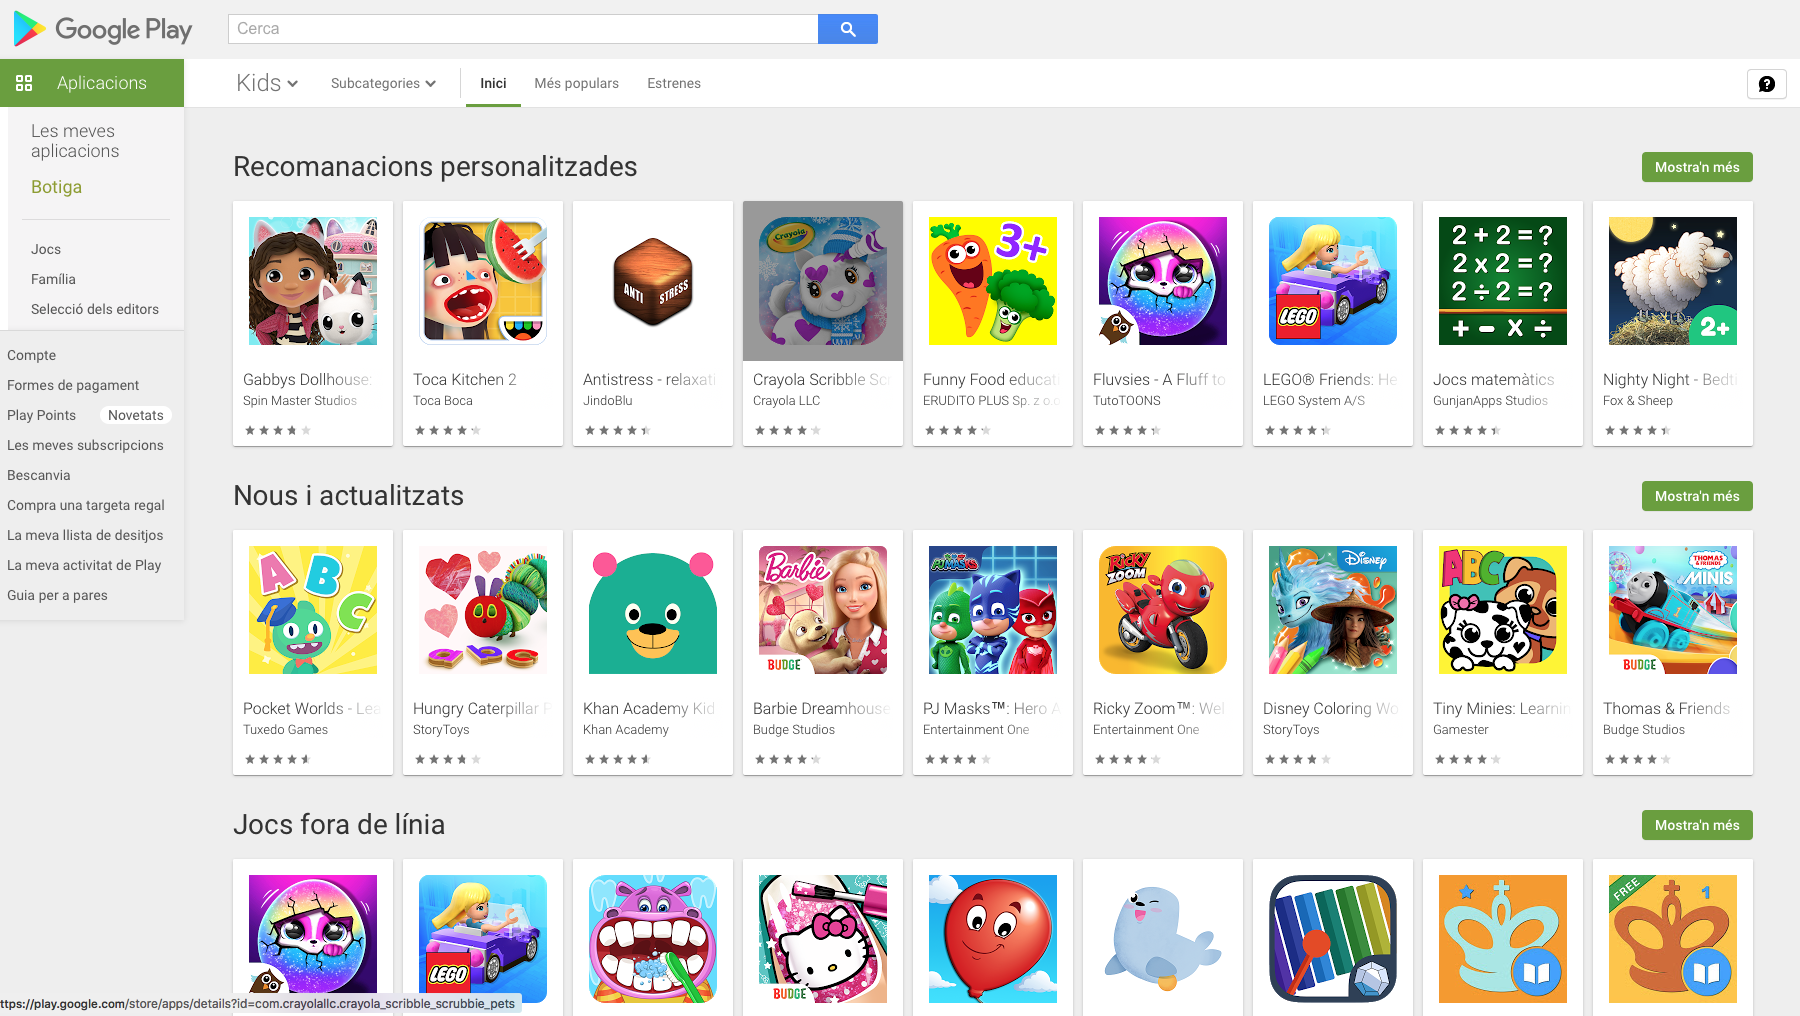

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [30]:
display_table(android_final, -4)

Tools : 8.440532611148726
Entertainment : 6.070864364703228
Education : 5.348679756262695
Business : 4.5926427443015125
Productivity : 3.8930264048747465
Lifestyle : 3.8930264048747465
Finance : 3.7011961182577298
Medical : 3.5206499661475967
Sports : 3.4642292936131795
Personalization : 3.3175355450236967
Communication : 3.238546603475513
Action : 3.1031369893929135
Health & Fitness : 3.080568720379147
Photography : 2.945159106296547
News & Magazines : 2.798465357707064
Social : 2.663055743624464
Travel & Local : 2.324531708417964
Shopping : 2.2455427668697814
Books & Reference : 2.143985556307831
Simulation : 2.0424283457458814
Dating : 1.8618821936357481
Arcade : 1.8505980591288649
Video Players & Editors : 1.7716091175806816
Casual : 1.7490408485669149
Maps & Navigation : 1.399232678853532
Food & Drink : 1.2412547957571656
Puzzle : 1.128413450688332
Racing : 0.9930038366057323
Role Playing : 0.9365831640713158
Libraries & Demo : 0.9365831640713158
Auto & Vehicles : 0.92529902956443

The difference between the Genres and the Category columns is not quite clear, but it looks like the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.
Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

## Most popular apps by Genre on the App Store

App Store is not giving us the number of downloads, so we are estimating users by ratings calculating an average.

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but for the App Store data set this information is missing. So we are estimating users by number of ratings, calculating an average. 

Below, we calculate the average number of user ratings per app genre on the App Store:

In [31]:
genres_ios = freq_table (ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


The highest score is for Navigations apps, probably because of Google Maps and Waze.

In [32]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5])

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


It would be the same issue for networking apps, where the average number is influenced by giants like Facebook, Skype..., or think about the ones for music like Spotify or Shazam. This "popularity" would be biased, since very few apps have hundreds of thousands of ratings, we could remove those ones. But we can leave that for later.

Another high score is "Reference" category. Let's check.

In [33]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


Again, the Bible and Dictionary.com are skewing up the average rating.

## Most popular apps by Genre on Google Play

We actually have data about the number of installs for this market.

In [34]:
display_table(android_final, 5)


1,000,000+ : 15.741367637102236
100,000+ : 11.554953735048521
10,000,000+ : 10.516813360415256
10,000+ : 10.200857594222523
1,000+ : 8.395396073121193
100+ : 6.917174452719477
5,000,000+ : 6.838185511171294
500,000+ : 5.574362446400361
50,000+ : 4.773188896411646
5,000+ : 4.513653802753328
10+ : 3.5432182351613632
500+ : 3.2498307379823967
50,000,000+ : 2.2906793048973144
100,000,000+ : 2.1214172872940646
50+ : 1.9183028661701647
5+ : 0.7898894154818324
1+ : 0.5077860528097494
500,000,000+ : 0.2708192281651997
1,000,000,000+ : 0.22568269013766643
0+ : 0.045136538027533285
0 : 0.011284134506883321


However, the install numbers are not precise enough. Most of the values are open-ended (100+, 1000+, 5000+...). Anyway, we don't need very precise data for our purposes. So let's assume they are just like that. We'll need a frequency table to convert strings to floats and get rid of characters if we want to perform calculations.

In [35]:
category_android = freq_table (android_final, 1)

for categories in category_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == categories:
            n_installs = app[5]
            n_installs = n_installs.replace('+','')
            n_installs = n_installs.replace(',','')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(categories, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1820673.076923077
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15560965.599534342
FAMILY : 3694276.334922527
MEDICAL : 120616.48717948717
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17805627.643678162
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10682301.033377837
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

On average, communication apps have the most installs: 38,456,119. This number is heavily skewed up by a few apps that have over one billion installs (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail, and Hangouts), and a few others with over 100 and 500 million installs:

In [37]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

If we remove all the communication apps that have over 100 million installs, the average would be reduced considerabily:

In [38]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

We see the same pattern for the video players category with 24,727,872 installs. The market is dominated by apps like Youtube, Google Play Movies & TV, or MX Player. The pattern is repeated for social apps (where we have giants like Facebook, Instagram, Google+, etc.), photography apps (Google Photos and other popular photo editors), or productivity apps (Microsoft Word, Dropbox, Google Calendar, Evernote, etc.).
Again, the main concern is that these app genres might seem more popular than they really are. Moreover, these niches seem to be dominated by a few giants who are hard to compete against.
The game genre seems pretty popular, but previously we found out this part of the market seems a bit saturated, so we'd like to come up with a different app recommendation if possible.
The books and reference genre looks fairly popular as well, with an average number of installs of 8,767,811. It's interesting to explore this in more depth, since we found this genre has some potential to work well on the App Store, and our aim is to recommend an app genre that shows potential for being profitable on both the App Store and Google Play.
Let's take a look at some of the apps from this genre and their number of installs:

In [39]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

The book and reference genre includes a variety of apps: software for processing and reading ebooks, various collections of libraries, dictionaries, tutorials on programming or languages, etc. It seems there's still a small number of extremely popular apps that skew the average:

In [40]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


However, it looks like there are only a few very popular apps, so this market still shows potential. Let's try to get some app ideas based on the kind of apps that are somewhere in the middle in terms of popularity (between 1,000,000 and 100,000,000 downloads):


In [41]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

This niche contains mainly software for processing and reading ebooks, as well as various collections of libraries and dictionaries, so it's probably not a good idea to build similar apps to avoid competition.
We also notice there are quite a few apps built around the Quran, (like the Bible in the previous market).

## Conclusions

We analyzed data about the App Store and Google Play mobile apps to suggest an app that can be profitable for both markets.
We concluded that taking a popular book (maybe a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.